In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import numpy as np

from hot_encoding_utils import form_of_ice, one_hot_m1, one_hot_m2


from scipy.interpolate import RectBivariateSpline

%matplotlib inline

In [2]:
pwd

'C:\\Alissa\\ENSG\\ING2\\STAGE\\Dev\\satellite-data-pipeline\\asip_v2'

In [3]:
%cd "D:/training"

D:\training


----- input 
 ['41', '92', '-9', '87', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['42', '92', '30', '91', '8', '70', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['43', '92', '10', '91', '8', '60', '87', '-9', '30', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['44', '50', '20', '93', '5', '20', '91', '5', '10', '87', '4', '98', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['45', '92', '30', '91', '8', '70', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['46', '80', '30', '91', '5', '30', '87', '4', '20', '87', '3', '-9', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['47', '80', '20', '93', '6', '20', '91', '5', '40', '87', '4', '-9', '-9', '-9', 'I'] 
-----output 
 [1, 0, 0, 0] 

----- input 
 ['48', '92', '-9', '91', '8', '-9', '-9', '-9', '-9', '-9', '

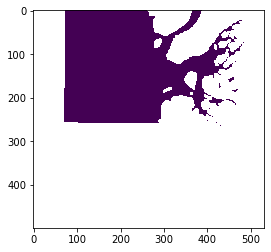

young ice


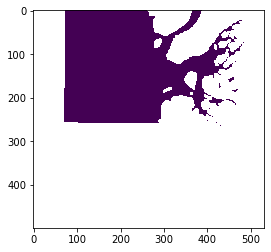

first-year ice


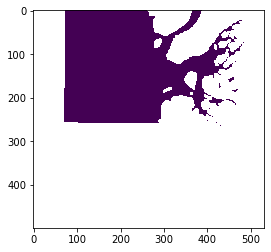

multi-year ice


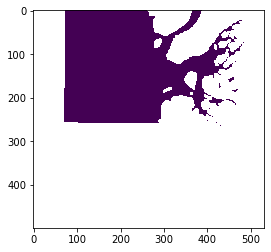

In [4]:
ifiles = sorted(glob.glob('*.nc'))
stp = 20

dir_ = "D:/training/reconstructs_folder"
ifiles_recon = glob.glob(dir_+'/*.npz')
# print(ifiles_recon)
# print(np.load(ifiles_recon[0]).files)
for i in range(len(ifiles)):
    #print(ifile)
    ifile = ifiles[i]
    ds = nc.Dataset(ifile)
    n,p=ds['nersc_sar_secondary'].shape
    sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
    ic = ds['polygon_icechart'][::stp, ::stp]
    
    n,p= ic.shape
    
    #construction of the 3D array that will be filled
    en_values_array=np.zeros((n,p,4))+np.nan
    
    map_id_to_variable_values=dict()
    for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
        id_val_splitted = id_and_corresponding_variable_values.split(";")
        #print(id_val_splitted)
        [ct, ca, sa, fa, cb, sb, fb, cc, sc] = list(map(int, id_val_splitted[1:10]))
        #result of the one-hot encoding method 
        result = one_hot_m1(ct,ca,sa,fa,cb,sb,fb,cc,sc)
        ## if you want the method with the concentration uncomment the following line 
#         result = one_hot_m2(ct,ca,sa,fa,cb,sb,fb,cc,sc)

        #Filling the dictionnary
        map_id_to_variable_values.update({int(id_val_splitted[0]): result})
        #print("----- input \n",ct,ca,sa,fa,cb,sb,fb,cc,sc, "\n-----output \n",result,"\n")
        print("----- input \n",id_val_splitted, "\n-----output \n",result,"\n")
        
    
    
    for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
               
        #Filling the 3D array
        en_values_array[ic == id_value, :] = np.byte(np.array(variable_belong_to_id))
    
    #Showing the different layers of the array
    ice_types = ["open water", "young ice", "first-year ice", "multi-year ice"]
    print(ifile)
    for i in range(4):
        print(ice_types[i])
        plt.imshow(en_values_array[:,:,i])
        plt.show()